In [6]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 63.5 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 1.6 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

plt.style.use('dark_background')

In [18]:
files.upload()

Saving buriat2.png to buriat2.png


{'buriat2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xba\x00\x00\x02n\x08\x02\x00\x00\x00\xd006w\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x1d\x87\x00\x00\x1d\x87\x01\x8f\xe5\xf1e\x00\x00\xff\xa5IDATx^\xec\xfd\xe7\x93#kb\x9f\x89r\xefn\xc4]\x91\x9a\x99c\xdb\x96/\x14\xbc\xf7\xde\x03\x05\xa0\xe0Q\x00\n(\x94\xf7\xde{\xef-\xca{_]\xedO\x1f\x7ff\x86\x9e")\x8a\x14ER\x94H\x8aN\x86+iw\xef\x7f\xb1\xf7\x97\x99}\x9a\x87\xd2\x8d\x98\xaf\x1dq\xdf\'\x9e\xc9I$\x12\xa8*\xf4\x90\xef\x83\xb4\xbfD \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x02\x81@ \x10\x08\x04\x

In [7]:
first = cv2.imread("javelin-before.jpg", cv2.IMREAD_GRAYSCALE)
second = cv2.imread("javelin-after.png", cv2.IMREAD_GRAYSCALE)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
kp1, des1 = sift.detectAndCompute(first, None)
kp2, des2 = sift.detectAndCompute(second, None)

In [9]:
class SelfMatcher:

    def __init__(self, dist="euclidean"):
        self.dist = dist

    def match(self, query_des: np.ndarray, train_des: np.ndarray):
        matched = []
        for queryIdx, qv in enumerate(query_des):
            min_dist = float("inf")
            min_idx = 0
            for trainIdx, tv in enumerate(train_des):
                dist = self._euclidean(qv, tv)
                if dist < min_dist:
                    min_dist, min_idx = dist, trainIdx
            matched.append(cv2.DMatch(queryIdx, min_idx, min_dist))
        return matched

    def _euclidean(self, qv: np.ndarray, tv: np.ndarray):
        return np.sqrt(np.sum((qv - tv) ** 2))

    def _norm_correlation(self, qv: np.ndarray, tv: np.ndarray):
        pass

In [10]:
def show(img1, kp1, img2, kp2, matches):
    out = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_axis_off()
    ax.imshow(out)

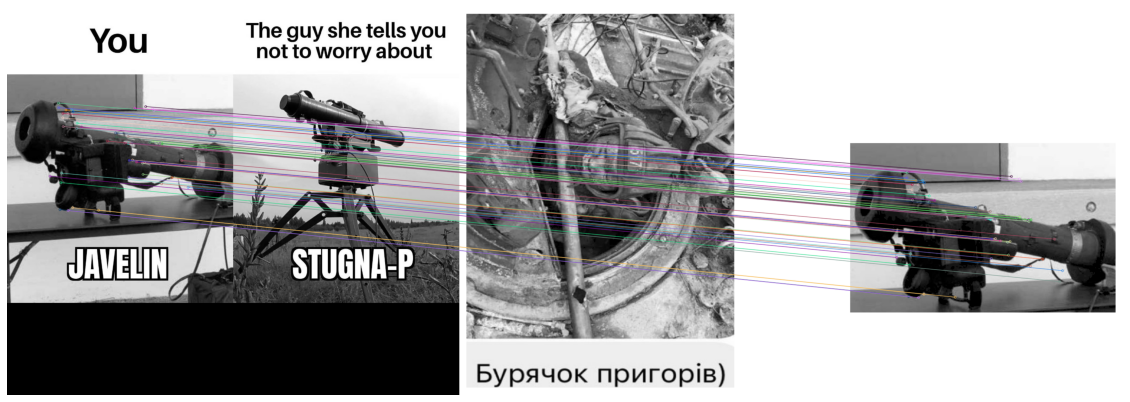

In [11]:
CVMatcher = cv2.BFMatcher()
matches1 = CVMatcher.match(des1, des2)
matches1 = sorted(matches1, key=lambda x: x.distance)
show(first, kp1, second, kp2, matches1[:50])

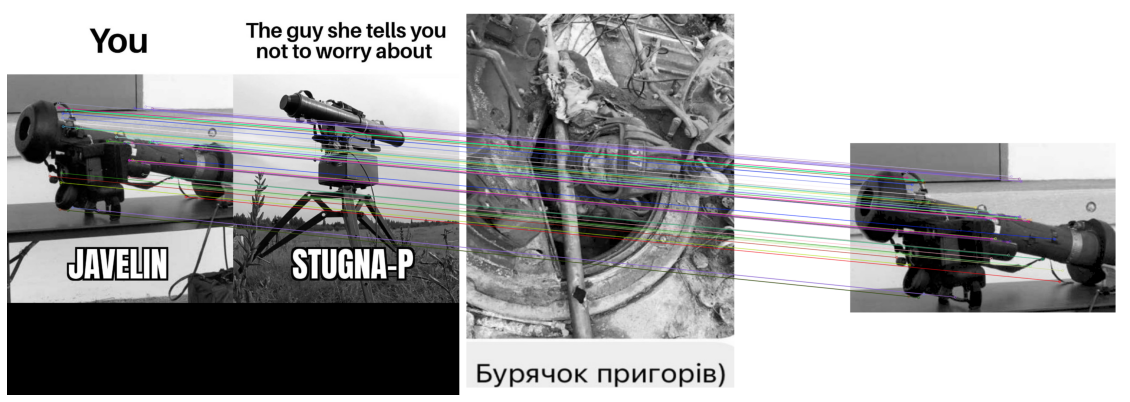

In [12]:
selfMatch = SelfMatcher()
matches2 = selfMatch.match(des1, des2)
matches2 = sorted(matches2, key = lambda x:x.distance)
show(first, kp1, second, kp2, matches2[:50])

In [13]:
for m1, m2 in zip(matches1, matches2):
    if m1.distance==m2.distance and m1.queryIdx==m2.queryIdx and m1.trainIdx==m2.trainIdx:
      print('True')
    else:
      print('False')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [19]:
first = cv2.imread("buriat.jpg", cv2.IMREAD_GRAYSCALE)
second = cv2.imread("buriat2.png", cv2.IMREAD_GRAYSCALE)

kp1, des1 = sift.detectAndCompute(first, None)
kp2, des2 = sift.detectAndCompute(second, None)

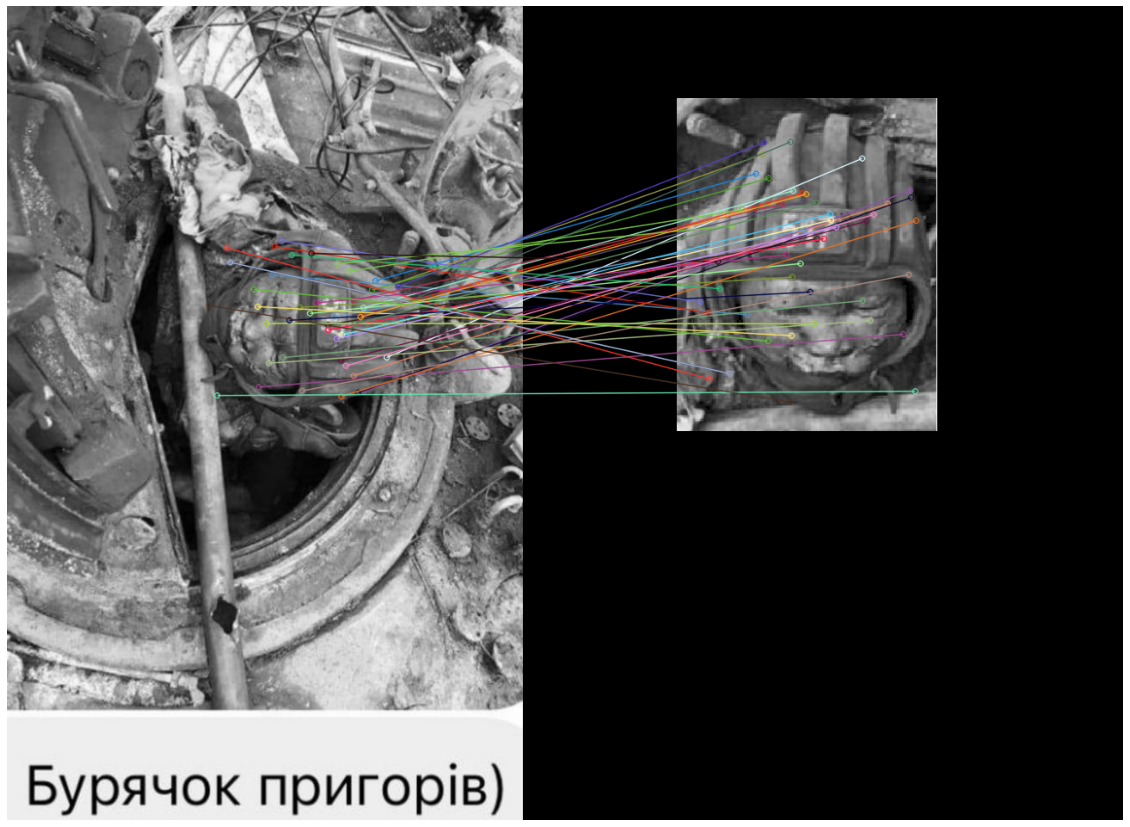

In [20]:
matches1 = CVMatcher.match(des1, des2)
matches1 = sorted(matches1, key=lambda x: x.distance)
show(first, kp1, second, kp2, matches1[:50])

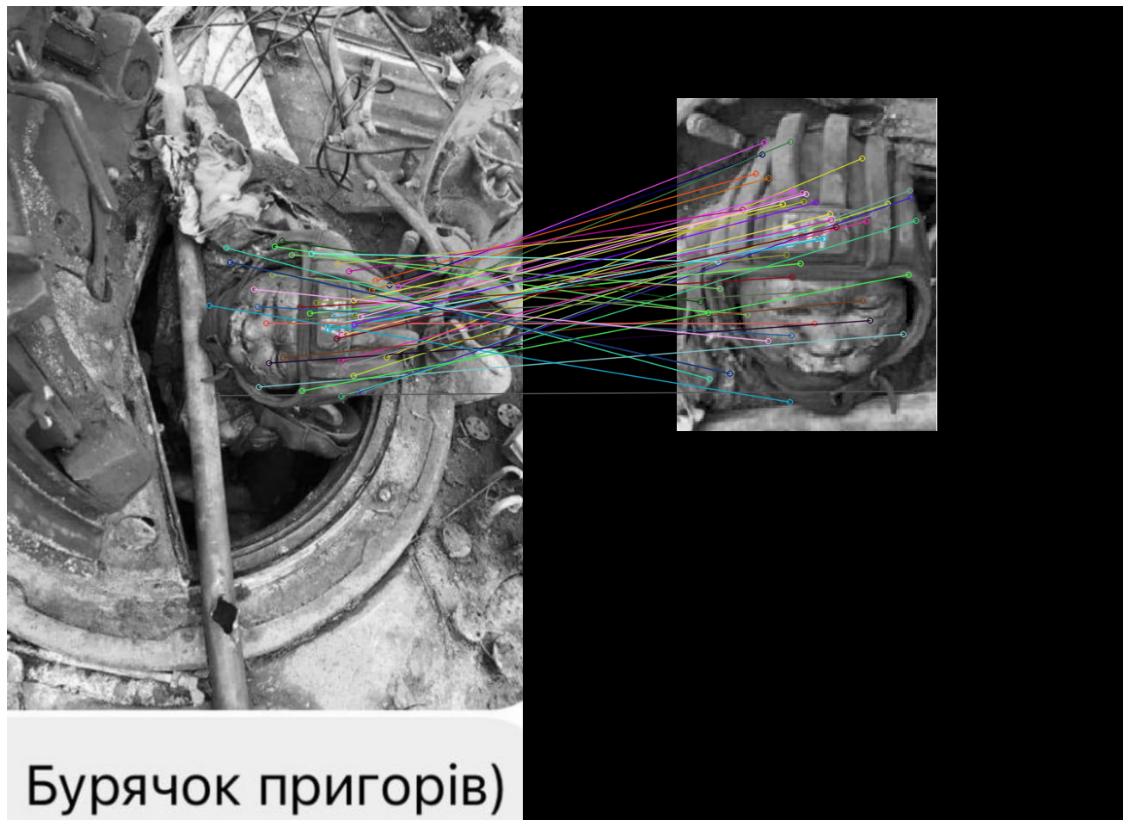

In [21]:
matches2 = selfMatch.match(des1, des2)
matches2 = sorted(matches2, key = lambda x:x.distance)
show(first, kp1, second, kp2, matches2[:50])

In [22]:
for m1, m2 in zip(matches1, matches2):
    if m1.distance==m2.distance and m1.queryIdx==m2.queryIdx and m1.trainIdx==m2.trainIdx:
      print('True')
    else:
      print('False')

Streaming output truncated to the last 5000 lines.
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True